In [1]:
def asl(inp):
    inp = inp.split('।')
    sentence_cnt = len(inp)
    word_cnt = 0
    for sentence in inp:
        words = sentence.strip().split(' ')
        word_cnt += len(words)
    return word_cnt/sentence_cnt

In [2]:
def awl(inp):
    words = inp.split(' ')
    words_f = len(words)
    word_len = 0
    for word in words:
        # word_len = 0
        for _ in word:
            if ord(_) >= ord('अ') and ord(_) <= ord('ह'):
                word_len += 1
        # print(f'{word}: {word_len}')
    return word_len/words_f

In [11]:
def matra_cnt(inp):
    words = inp.split(' ')
    polysyll = 0
    syll_cnt = 0
    juk_cnt = 0
    for word in words:
        matra_cnt = 0
        for ind,_ in enumerate(word):
            if ord(_) >= ord('अ') and ord(_) <= ord('औ'):
                matra_cnt += 2
                if _ == 'अ' or _ == 'इ' or _ == 'उ' or _ == 'ऋ':
                    matra_cnt -= 1
            if ord(_) >= ord('ा') and ord(_) <= ord('ौ'):
                matra_cnt += 1
                if ord(_) == ord('ि') or ord(_) == ord('ु') or _ == 'ृ' or _ == 'ँ':
                    matra_cnt -= 1
            elif ord(_) >= ord('क') and ord(_) <= ord('ह'):
                matra_cnt += 1
            elif _ == '्':
                juk_cnt += 1
                if ind >= 2:
                    matra_cnt += 1
                    if ord(word[ind-2]) >= ord('क') and ord(word[ind-2]) <= ord('ह'):
                        matra_cnt -= 1
                    elif word[ind-2] == 'ि' or word[ind-2] == 'ु' or word[ind-2] == 'ृ' or word[ind-2] == 'ँ':
                        matra_cnt -= 1
                    elif ord(word[ind-2]) >= ord('ा') and ord(word[ind-2]) <= ord('ौ'):
                        matra_cnt -= 2
                    elif word[ind-2] == 'अ' or word[ind-2] == 'इ' or word[ind-2] == 'उ' or word[ind-2] == 'ऋ':
                        matra_cnt -= 1
                    elif ord(word[ind-2]) >= ord('आ') and ord(word[ind-2]) <= ord('औ'):
                        matra_cnt -= 2
                else:
                    matra_cnt -= 1
        syll_cnt += matra_cnt
        if matra_cnt > 2:
            polysyll += 1
    return (polysyll, syll_cnt, juk_cnt)

In [38]:
def model(inp):
    ret_li = [awl(inp),asl(inp)]
    ret_li.extend(list((matra_cnt(inp))))
    return ret_li

In [5]:
import os
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [39]:
dic = {}
for i in os.listdir('./train'):
    txt = ''''''
    with open(f'./train/{i}', 'r') as f:
        for line in f:
            txt += line
    dic[int(i.split(' ')[1].split('.')[0])] = model(txt)
dic = dict(sorted(dic.items()))
dic

{1: [1.1619385342789599, 18.569767441860463, 609, 2973, 76],
 2: [1.6801493466085875, 14.30622009569378, 1689, 8171, 125],
 3: [1.7870408584399504, 13.074712643678161, 1356, 6482, 114],
 4: [2.112054794520548, 14.382716049382717, 2223, 11367, 303],
 5: [2.034029389017788, 15.415254237288135, 2330, 11617, 292],
 6: [1.9924281790512954, 7.004728132387707, 7701, 38651, 1667],
 7: [2.196326109391125, 15.304347826086957, 14514, 75103, 3589],
 8: [2.43395968256864, 88.0, 14212, 74581, 4012],
 9: [2.1487230846269405, 14.987240829346092, 5897, 31140, 1300],
 10: [2.4018108023727756, 23.21410579345088, 6043, 32492, 1561],
 11: [2.2079103738549146, 18.227110582639714, 9784, 51885, 1952],
 12: [2.2745935197099074, 24.045387994143486, 10443, 56059, 2168],
 13: [2.066588183356633, 17.218498659517426, 8182, 41749, 931]}

In [40]:
y = np.array(list(dic.keys()))
x = np.array(list(dic.values()))

In [41]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [42]:
reg.coef_

array([ 4.45587281e+00,  1.11655207e-02, -5.59376589e-03,  1.43351529e-03,
       -6.34877257e-03])

In [45]:
dic = {}
for i in os.listdir('./test'):
    txt = ''''''
    with open(f'./test/{i}', 'r') as f:
        for line in f:
            txt += line
    y = reg.predict(np.array(model(txt)).reshape(1,5))
    dic[int(i.split(' ')[1].split('.')[0])] = y
dic = dict(sorted(dic.items()))
dic

{1: array([-0.37558649]),
 2: array([2.75085127]),
 3: array([3.4636344]),
 4: array([5.0598668]),
 5: array([4.81458026]),
 6: array([4.22953334]),
 7: array([3.77274148]),
 8: array([8.42591055]),
 9: array([6.63604335]),
 10: array([7.16077842]),
 11: array([8.40672533]),
 12: array([10.38288049]),
 13: array([8.46682321])}

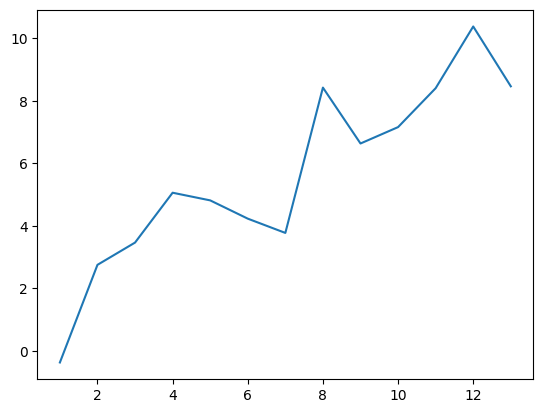

In [46]:
plt.plot(dic.keys(),dic.values())